In [1]:
import pydatasci as pds
from pydatasci import aidb
import os, sqlite3, io, gzip 
import pandas as pd
import numpy as np

/Users/layne/.pyenv/versions/3.7.6/envs/jupyterlab/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
from importlib import reload; aidb.delete_db(True); reload(aidb); aidb.create_db()


=> Success - deleted database file at path:
/Users/layne/Library/Application Support/pydatasci/aidb.sqlite3


=> Success - created database file for machine learning metrics at path:
/Users/layne/Library/Application Support/pydatasci/aidb.sqlite3


=> Success - created the following tables within database:
['algorithm', 'dataset', 'featureset', 'foldset', 'job', 'label', 'splitset']



In [3]:
os.getcwd()

'/Users/layne/Desktop/pydatasci'

---

In [99]:
arr_train_features = #train numpy
arr_train_labels = #train labels of matching indices of arr_t

In [197]:
# Allow people to specify the random state since it will always return the same otherwise.
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=2)

In [198]:
# Remember, even though it only spits out indices, it needs labels for stratification.
splitz_gen = skf.split(arr_train_features, arr_train_labels)

NameError: name 'arr_train_features' is not defined

In [199]:
splitz, i  = {}, -1

In [200]:
for train_index, validation_index in splitz_gen:
    i+=1
    splitz[i]={"train": train_index, "validation": validation_index}

In [193]:
splitz

{0: {'train': array([0, 1, 2, 5, 6, 7]), 'validation': array([3, 4])},
 1: {'train': array([0, 1, 3, 4, 6, 7]), 'validation': array([2, 5])},
 2: {'train': array([1, 2, 3, 4, 5, 6]), 'validation': array([0, 7])},
 3: {'train': array([0, 2, 3, 4, 5, 7]), 'validation': array([1, 6])}}

In [52]:
dataset = aidb.Dataset.from_file(
	path = 'iris.tsv' 
	,file_format = 'tsv'
	,name = 'tab-separated plants'
	,perform_gzip = True
    ,dtype = 'float64'
)

In [54]:
df = dataset.to_pandas()

In [55]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


---

In [4]:
dataset = aidb.Dataset.from_file(
	path = 'iris.tsv' 
	,file_format = 'tsv'
	,name = 'tab-separated plants'
	,perform_gzip = True
    ,dtype = 'float64'
)

In [5]:
label_name = 'target'

In [6]:
label = dataset.make_label(column=label_name)

In [7]:
featureset = dataset.make_featureset(exclude_columns=[label_name])

In [8]:
splitset = featureset.make_splitset(label_name=label_name)

In [9]:
splitset_train68_val12_test20 = featureset.make_splitset(
	label_name='target'
	, size_test = 0.20
	, size_validation = 0.12
)

In [10]:
splitset_train68_val12_test20.make_foldset(fold_count=3)

<Foldset: 1>

---

In [9]:
featureset = aidb.Featureset.from_dataset(
    dataset_id = 1
    , include_columns = None
    , exclude_columns = None
)

In [11]:
featureset = aidb.Featureset.from_dataset(
    dataset_id = 1
    , include_columns = ['petal width (cm)', 'petal length (cm)']
    , exclude_columns = None
)

In [12]:
featureset = aidb.Featureset.from_dataset(
    dataset_id = 1
    , include_columns = ['petal width (cm)', 'petal length (cm)']
    , exclude_columns = None
)

ValueError: 
Yikes - This Dataset already has Featureset <id:3> with the same columns.
Cannot create duplicate.


---

In [17]:
def check_s(s):
    print(s.sizes)
    print(s.is_validated)
    print(s.is_folded)

In [18]:
s1 = aidb.Splitset.from_featureset(featureset_id=f1.id, size_test=0.20, size_validation=0.12)

In [19]:
check_s(s1)

{'validation': {'percent': 0.12, 'count': 18}, 'test': {'percent': 0.2, 'count': 30}, 'train': {'percent': 0.68, 'count': 102}}
True
False


In [20]:
s2 = aidb.Splitset.from_featureset(featureset_id=f1.id, size_test=0.20)

In [21]:
check_s(s2)

{'test': {'percent': 0.2, 'count': 30}, 'train': {'percent': 0.8, 'count': 120}}
False
False


In [22]:
s3 = aidb.Splitset.from_featureset(featureset_id=f4.id)

In [23]:
check_s(s3)

{'train': {'percent': 1.0, 'count': 150}}
False
False


In [24]:
s4 = aidb.Splitset.from_featureset(featureset_id=f1.id)

In [25]:
check_s(s4)

{'test': {'percent': 0.25, 'count': 38}, 'train': {'percent': 0.75, 'count': 112}}
False
False


In [26]:
s1.to_numpy()

{'validation': {'features': array([[5.1, 3.7, 1.5, 0.4],
         [4.9, 3.6, 1.4, 0.1],
         [6. , 2.2, 5. , 1.5],
         [6.4, 2.8, 5.6, 2.1],
         [6.3, 2.5, 5. , 1.9],
         [5.7, 2.8, 4.5, 1.3],
         [6.5, 3. , 5.2, 2. ],
         [5.7, 2.8, 4.1, 1.3],
         [6.7, 3.1, 4.4, 1.4],
         [6.9, 3.1, 4.9, 1.5],
         [5.6, 2.9, 3.6, 1.3],
         [5. , 3.3, 1.4, 0.2],
         [5. , 3. , 1.6, 0.2],
         [6.2, 3.4, 5.4, 2.3],
         [5.7, 4.4, 1.5, 0.4],
         [6.4, 2.8, 5.6, 2.2],
         [5.8, 4. , 1.2, 0.2],
         [4.9, 3.1, 1.5, 0.1],
         [4.6, 3.2, 1.4, 0.2],
         [6.1, 2.6, 5.6, 1.4],
         [6.7, 3. , 5. , 1.7],
         [5.1, 2.5, 3. , 1.1],
         [5.5, 4.2, 1.4, 0.2],
         [4.6, 3.1, 1.5, 0.2],
         [6.3, 3.3, 4.7, 1.6],
         [5.4, 3. , 4.5, 1.5],
         [7.6, 3. , 6.6, 2.1],
         [6.7, 3.1, 5.6, 2.4],
         [6.3, 2.7, 4.9, 1.8],
         [7. , 3.2, 4.7, 1.4]]),
  'labels': array([[0.],
         [0.],
  

In [27]:
s2.to_numpy()

{'train': {'features': array([[6.5, 3. , 5.5, 1.8],
         [7.7, 3. , 6.1, 2.3],
         [5.1, 2.5, 3. , 1.1],
         [5. , 3. , 1.6, 0.2],
         [4.6, 3.4, 1.4, 0.3],
         [4.6, 3.1, 1.5, 0.2],
         [5.1, 3.8, 1.9, 0.4],
         [6.7, 3. , 5.2, 2.3],
         [6.9, 3.1, 5.4, 2.1],
         [5.4, 3.9, 1.3, 0.4],
         [5.6, 3. , 4.1, 1.3],
         [5. , 3.4, 1.6, 0.4],
         [5.5, 2.5, 4. , 1.3],
         [5.1, 3.3, 1.7, 0.5],
         [6.3, 3.4, 5.6, 2.4],
         [6. , 2.2, 5. , 1.5],
         [5. , 2.3, 3.3, 1. ],
         [5. , 3.6, 1.4, 0.2],
         [5.8, 2.7, 5.1, 1.9],
         [6.2, 2.2, 4.5, 1.5],
         [6.7, 3.1, 4.7, 1.5],
         [5.5, 2.4, 3.8, 1.1],
         [6.9, 3.1, 4.9, 1.5],
         [6.5, 2.8, 4.6, 1.5],
         [7.4, 2.8, 6.1, 1.9],
         [5.4, 3.9, 1.7, 0.4],
         [6.2, 3.4, 5.4, 2.3],
         [5.8, 4. , 1.2, 0.2],
         [6.3, 2.5, 5. , 1.9],
         [5.7, 2.6, 3.5, 1. ]]),
  'labels': array([[2.],
         [2.],
       

In [28]:
s3.to_numpy()

{'train': {'features': array([[5.1, 3.5, 1.4, 0.2, 0. ],
         [4.9, 3. , 1.4, 0.2, 0. ],
         [4.7, 3.2, 1.3, 0.2, 0. ],
         [4.6, 3.1, 1.5, 0.2, 0. ],
         [5. , 3.6, 1.4, 0.2, 0. ],
         [5.4, 3.9, 1.7, 0.4, 0. ],
         [4.6, 3.4, 1.4, 0.3, 0. ],
         [5. , 3.4, 1.5, 0.2, 0. ],
         [4.4, 2.9, 1.4, 0.2, 0. ],
         [4.9, 3.1, 1.5, 0.1, 0. ],
         [5.4, 3.7, 1.5, 0.2, 0. ],
         [4.8, 3.4, 1.6, 0.2, 0. ],
         [4.8, 3. , 1.4, 0.1, 0. ],
         [4.3, 3. , 1.1, 0.1, 0. ],
         [5.8, 4. , 1.2, 0.2, 0. ],
         [5.7, 4.4, 1.5, 0.4, 0. ],
         [5.4, 3.9, 1.3, 0.4, 0. ],
         [5.1, 3.5, 1.4, 0.3, 0. ],
         [5.7, 3.8, 1.7, 0.3, 0. ],
         [5.1, 3.8, 1.5, 0.3, 0. ],
         [5.4, 3.4, 1.7, 0.2, 0. ],
         [5.1, 3.7, 1.5, 0.4, 0. ],
         [4.6, 3.6, 1. , 0.2, 0. ],
         [5.1, 3.3, 1.7, 0.5, 0. ],
         [4.8, 3.4, 1.9, 0.2, 0. ],
         [5. , 3. , 1.6, 0.2, 0. ],
         [5. , 3.4, 1.6, 0.4, 0. ],
       

In [29]:
s4.to_numpy()

{'train': {'features': array([[4.6, 3.1, 1.5, 0.2],
         [6.7, 3.3, 5.7, 2.5],
         [5.1, 3.4, 1.5, 0.2],
         [6.9, 3.2, 5.7, 2.3],
         [4.5, 2.3, 1.3, 0.3],
         [5.1, 3.8, 1.9, 0.4],
         [6.3, 2.5, 5. , 1.9],
         [5.5, 2.3, 4. , 1.3],
         [6.4, 2.8, 5.6, 2.2],
         [6. , 2.9, 4.5, 1.5],
         [6.4, 2.9, 4.3, 1.3],
         [5.8, 4. , 1.2, 0.2],
         [4.6, 3.2, 1.4, 0.2],
         [5.5, 2.5, 4. , 1.3],
         [6.7, 3.1, 4.7, 1.5],
         [5.6, 2.5, 3.9, 1.1],
         [5.1, 3.8, 1.5, 0.3],
         [6.7, 3.1, 5.6, 2.4],
         [6.4, 3.2, 4.5, 1.5],
         [6.3, 3.3, 4.7, 1.6],
         [6.5, 3.2, 5.1, 2. ],
         [6.2, 3.4, 5.4, 2.3],
         [4.9, 2.4, 3.3, 1. ],
         [6.3, 2.9, 5.6, 1.8],
         [5.6, 3. , 4.1, 1.3],
         [6.4, 3.1, 5.5, 1.8],
         [4.8, 3. , 1.4, 0.1],
         [6.1, 3. , 4.9, 1.8],
         [5.5, 3.5, 1.3, 0.2],
         [5.7, 3.8, 1.7, 0.3],
         [5. , 3. , 1.6, 0.2],
         [6.1, 2.9

---

- For kfold I would not recommend multiple iterations.
- For regular fold I would recommend it.

> You either have a 2 (train-test) or 3 (train-val-test) way split. Then it's a question of whether or not you are generating kfolds in your training set.

^ Can sklearn kfold preserve index?

^ Stratified on continuous target?

---

Does train_test_split give different indices each time? = YES

In [35]:
f.columns

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [36]:
l.column

'target'

In [39]:
f_data = aidb.Dataset.read_to_numpy(id=1, columns=f.columns)
f_data[:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

In [40]:
l_data = aidb.Dataset.read_to_numpy(id=1, columns=l.column)
l_data[:4]

array([[0.],
       [0.],
       [0.],
       [0.]])

In [45]:
row_count = l_data.shape[0]
arr_idx = np.arange(row_count)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
features_train1, features_test1, labels_train1, labels_test1, indices_train1, indices_test1 = train_test_split(
    f_data, l_data, arr_idx
    ,stratify = l_data
)

In [48]:
features_train2, features_test2, labels_train2, labels_test2, indices_train2, indices_test2 = train_test_split(
    f_data, l_data, arr_idx
    ,stratify = l_data
)

In [49]:
indices_train2 == indices_train1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [50]:
indices_test2 == indices_test1

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [51]:
indices_train1_lst, indices_test1_lst, indices_train2_lst, indices_test2_lst = indices_train1.tolist(), indices_test1.tolist(), indices_train2.tolist(), indices_test2.tolist()

In [63]:
length_train = len(indices_train2_lst)
length_test = len(indices_test2_lst)

In [66]:
for i in range(length_train):
    print(indices_train1_lst[i] in indices_train2_lst)

True
True
False
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
False
True
True
False
True
True
False
True
False
True
True
False
True
True
True
True
True
True
False
False
False
False
False
False
True
True
True
True
False
True
False
True
False
False
False
False
False
True
True
True
True
True
True
True
True
False
True
True
True
False
True
True
False
False
True
False
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True
True
True
False
True
True


In [67]:
for i in range(length_test):
    print(indices_test1_lst[i] in indices_test2_lst)

False
False
False
True
False
True
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
True
True
False
False
False


---

Overview: https://scikit-learn.org/stable/modules/cross_validation.html

Split Methods: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

There is no stratified split for continuous variables:
- 2 way split binning workaround: https://stackoverflow.com/a/39501510/5739514
- kfold sklearn-based approach: https://github.com/scikit-learn/scikit-learn/issues/4757#issuecomment-694924478

In [19]:
flts = np.arange(117, 1080, 3.13)
rand_flts = np.random.choice(flts, size=150)  

In [20]:
rand_flts

array([ 217.16,  724.22,  251.59,  680.4 ,  138.91,  286.02,  157.69,
        692.92,  367.4 ,  958.97,  843.16,  852.55,  558.33,  620.93,
        777.43,  129.52,  962.1 ,  383.05,  993.4 ,  689.79,  301.67,
        627.19,  774.3 ,  908.89,  173.34,  755.52,  508.25,  667.88,
        117.  ,  624.06, 1068.52,  686.66,  599.02,  201.51,  176.47,
        614.67, 1034.09,  289.15,  129.52,  705.44,  573.98,  242.2 ,
        793.08, 1027.83,  987.14,  652.23,  358.01,  408.09,  292.28,
        561.46, 1065.39,  448.78,  586.5 ,  248.46,  736.74,  630.32,
        408.09,  739.87,  811.86,  408.09, 1021.57,  292.28,  223.42,
        383.05,  436.26,  958.97,  680.4 ,  117.  ,  527.03,  836.9 ,
        448.78,  486.34,  608.41,  489.47,  505.12,  332.97,  354.88,
        207.77,  696.05,  154.56,  893.24,  908.89,  364.27,  430.  ,
        145.17, 1043.48,  893.24,  464.43,  495.73,  924.54,  849.42,
        877.59,  996.53,  580.24,  683.53,  295.41,  511.38,  492.6 ,
        423.74,  289

(array([22., 14., 19., 17., 19., 17., 15., 12., 15.]),
 array([ 117.        ,  222.72444444,  328.44888889,  434.17333333,
         539.89777778,  645.62222222,  751.34666667,  857.07111111,
         962.79555556, 1068.52      ]),
 <BarContainer object of 9 artists>)

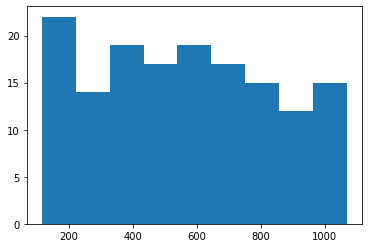

In [21]:
import matplotlib.pyplot as plt
plt.hist(rand_flts, bins='auto')

In [26]:
max = np.amax(rand_flts)
min = np.amin(rand_flts)
print(min)
print(max)

117.0
1068.5199999999986


In [27]:
num_bins = 4

In [28]:
bins = np.linspace(start=min, stop=max, num=num_bins)
bins

array([ 117.        ,  434.17333333,  751.34666667, 1068.52      ])

In [29]:
# Without `right=True`, it will make the max value a separate bin.
flts_binned = np.digitize(rand_flts, bins, right=True)
flts_binned

array([1, 2, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2,
       3, 3, 1, 3, 2, 2, 0, 2, 3, 2, 2, 1, 1, 2, 3, 1, 1, 2, 2, 1, 3, 3,
       3, 2, 1, 1, 1, 2, 3, 2, 2, 1, 2, 2, 1, 2, 3, 1, 3, 1, 1, 1, 2, 3,
       2, 0, 2, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 3, 1, 1, 1, 3, 3, 2,
       2, 3, 3, 3, 3, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 2,
       2, 1, 2, 1, 2, 2, 3, 1, 3, 1, 2, 1, 3, 1, 3, 3, 2, 3, 3, 2, 2, 1,
       2, 3, 1, 2, 3, 1, 3, 3, 2, 3, 1, 3, 2, 1, 1, 2, 1, 3])

^ these are just wrong. there are plenty in bin 3.

Let's pretend `flts` is the target

In [32]:
from sklearn.model_selection import train_test_split

In [35]:
features_train, features_test, labels_train, labels_test = train_test_split(
    featureset.to_numpy(), rand_flts,
    stratify = flts_binned
)

(array([29., 32., 25., 26.]),
 array([ 117.  ,  354.88,  592.76,  830.64, 1068.52]),
 <BarContainer object of 4 artists>)

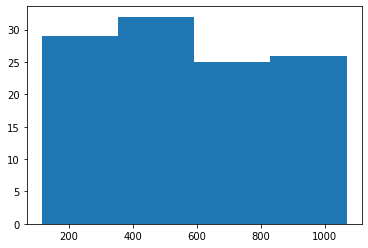

In [36]:
plt.hist(labels_train, bins=num_bins) 

(array([10.,  8., 13.,  7.]),
 array([ 129.52  ,  365.0525,  600.585 ,  836.1175, 1071.65  ]),
 <BarContainer object of 4 artists>)

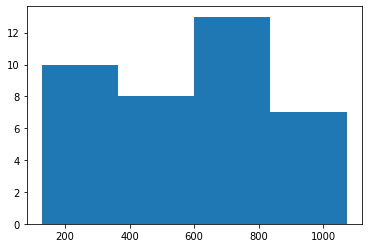

In [336]:
plt.hist(labels_test, bins=num_bins) 

---

In [2]:
s = aidb.Splitset.get_by_id(1)

In [3]:
dct = s.read_to_pandas()

In [4]:
dct

{'validation': {'features':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
  0                  5.1               3.5                1.4               0.2
  1                  4.9               3.0                1.4               0.2
  2                  4.7               3.2                1.3               0.2
  3                  4.6               3.1                1.5               0.2
  4                  5.0               3.6                1.4               0.2
  ..                 ...               ...                ...               ...
  145                6.7               3.0                5.2               2.3
  146                6.3               2.5                5.0               1.9
  147                6.5               3.0                5.2               2.0
  148                6.2               3.4                5.4               2.3
  149                5.9               3.0                5.1               1.8
  
  [150 rows